In [3]:
import pandas as pd
import numpy as np
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] 
from statsmodels.tsa.vector_ar.var_model import VAR
import plotly.graph_objects as go
from numpy.lib.stride_tricks import sliding_window_view
import statsmodels.api as sm

In [4]:
day_list_long = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
day_list_short = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
day_list_Feb = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
x_label = []
for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    if month in ['01', '03', '05', '07', '08','10', '12']:
        day_list = day_list_long
    elif month == '02':
        day_list = day_list_Feb
    else:
        day_list = day_list_short
    for day in day_list:
        for hour in range(0,24):
            hour = str(hour)
            key = int('21'+ month + day + hour)
            key = str(key)
            x_label.append(key)

In [5]:
mobile = np.load('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Tokyostation/Tokyostation_2021.npy')
twitter = np.load('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Tokyostation_2021/Tokyostation_3zi_2021.npy')

In [6]:
mobile_flatten = mobile.flatten()
twitter_flatten = twitter.flatten()

In [7]:
mobile_perday = np.sum(mobile, axis=1)
twitter_perday = np.sum(twitter, axis=1)

In [8]:
twitter_flatten[459] = twitter_flatten[458]

## 平滑化

In [9]:
fig = go.Figure(data=[
    #go.Scatter(x=x_label, y=mobile_flatten_stand, name='mobile'),
    go.Scatter(x=x_label, y=mobile_flatten, name="mobile"),
    #go.Scatter(x=x_label, y=twitter_flatten_stand - mobile_flatten_stand, name="diff")
])
fig.show()

In [10]:
fig = go.Figure(data=[
    #go.Scatter(x=x_label, y=mobile_flatten_stand, name='mobile'),
    go.Scatter(x=x_label, y=twitter_flatten, name="twitter"),
    #go.Scatter(x=x_label, y=twitter_flatten_stand - mobile_flatten_stand, name="diff")
])
fig.show()

In [11]:
sliding_window_view(twitter_flatten, 3)

array([[11,  2,  0],
       [ 2,  0,  2],
       [ 0,  2,  1],
       ...,
       [29, 25, 20],
       [25, 20, 15],
       [20, 15, 12]])

In [12]:
smooth_twitter = np.average(sliding_window_view(twitter_flatten, 5), axis=1)

In [13]:
len(x_label)

8760

In [14]:
fig = go.Figure(data=[
    go.Scatter(x=x_label[1:8659], y=smooth_twitter, name="twitter"),
])
fig.show()

## 相関

In [15]:
p_acf_mobile = sm.tsa.stattools.acf(mobile_flatten)
p_acf_twitter = sm.tsa.stattools.acf(twitter_flatten)

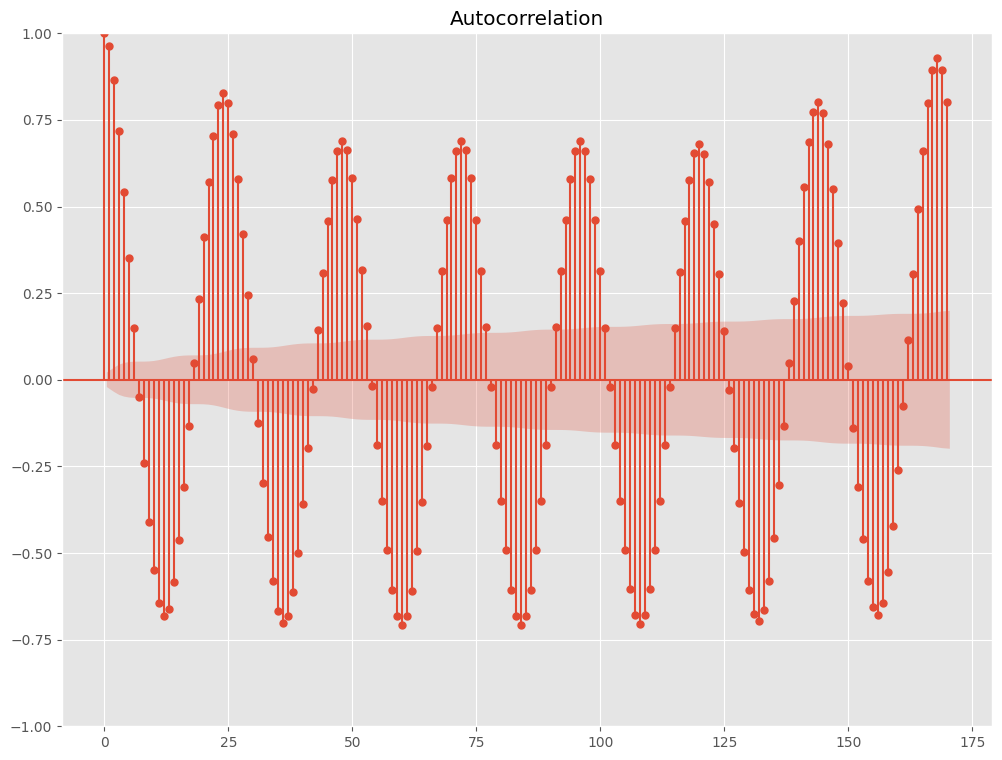

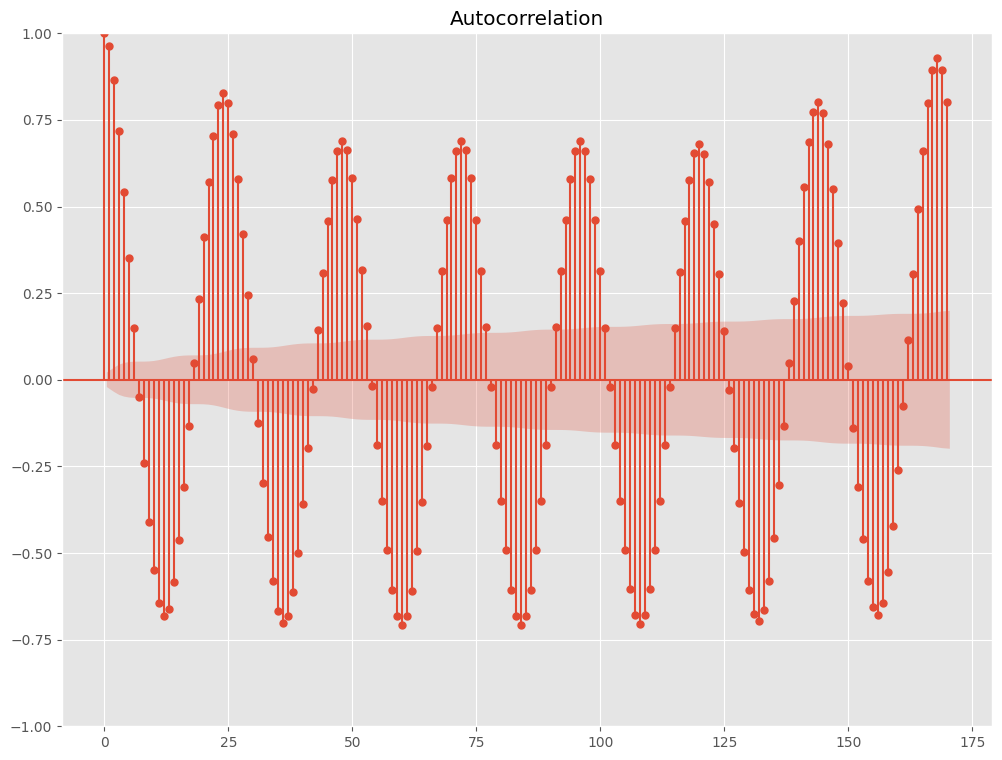

In [17]:
sm.graphics.tsa.plot_acf(mobile_flatten, lags=170)

/home/is/shuntaro-o/dev/compare_population_and_tweet_number/.venv/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



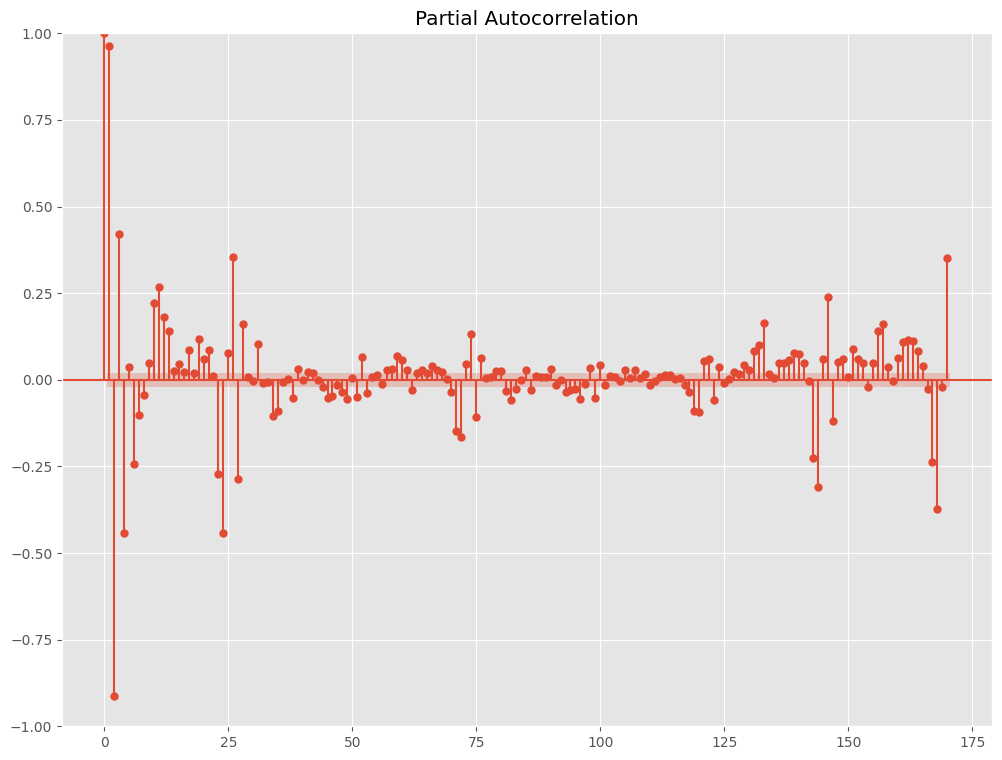

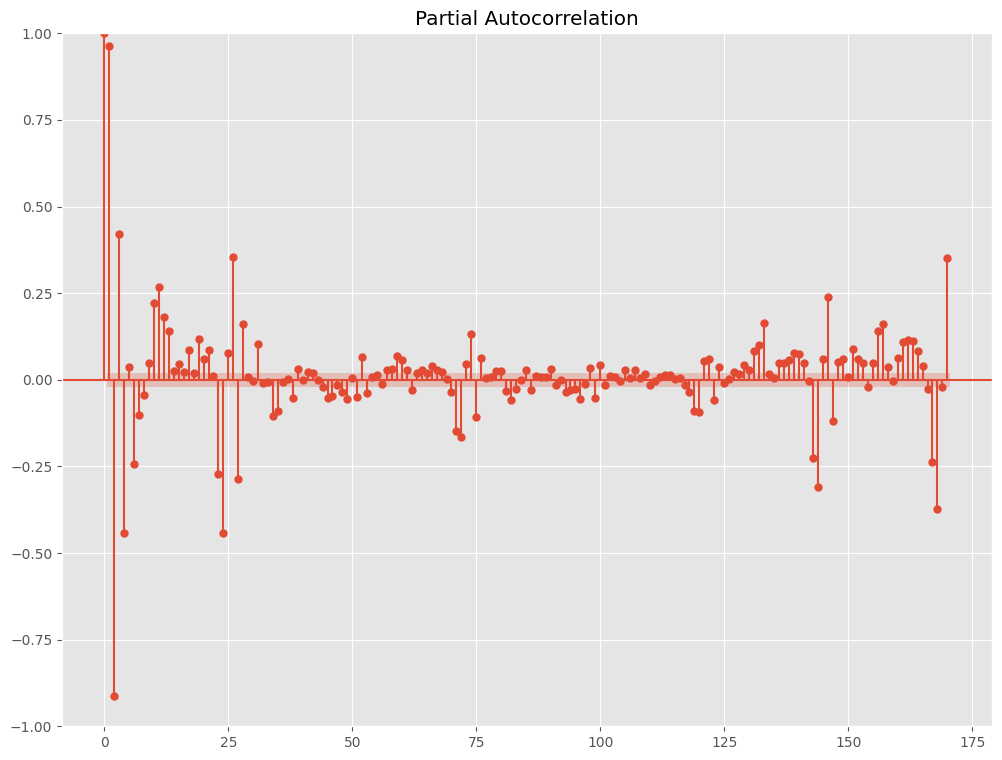

In [18]:
sm.graphics.tsa.plot_pacf(mobile_flatten, lags=170)

## 加算モデル

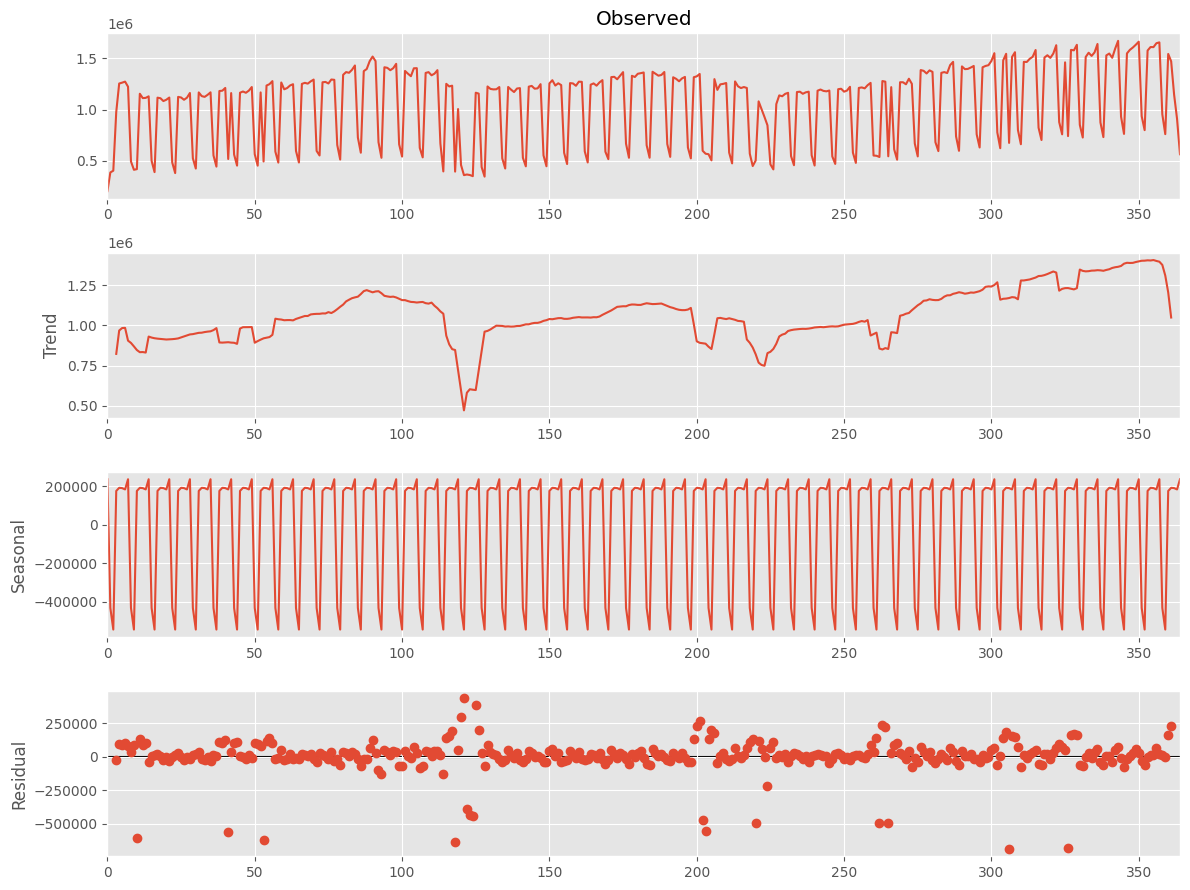

In [79]:
# 成分分解
result=seasonal_decompose(mobile_perday, model='additive', period=7)
# グラフ化
result.plot()
plt.show()

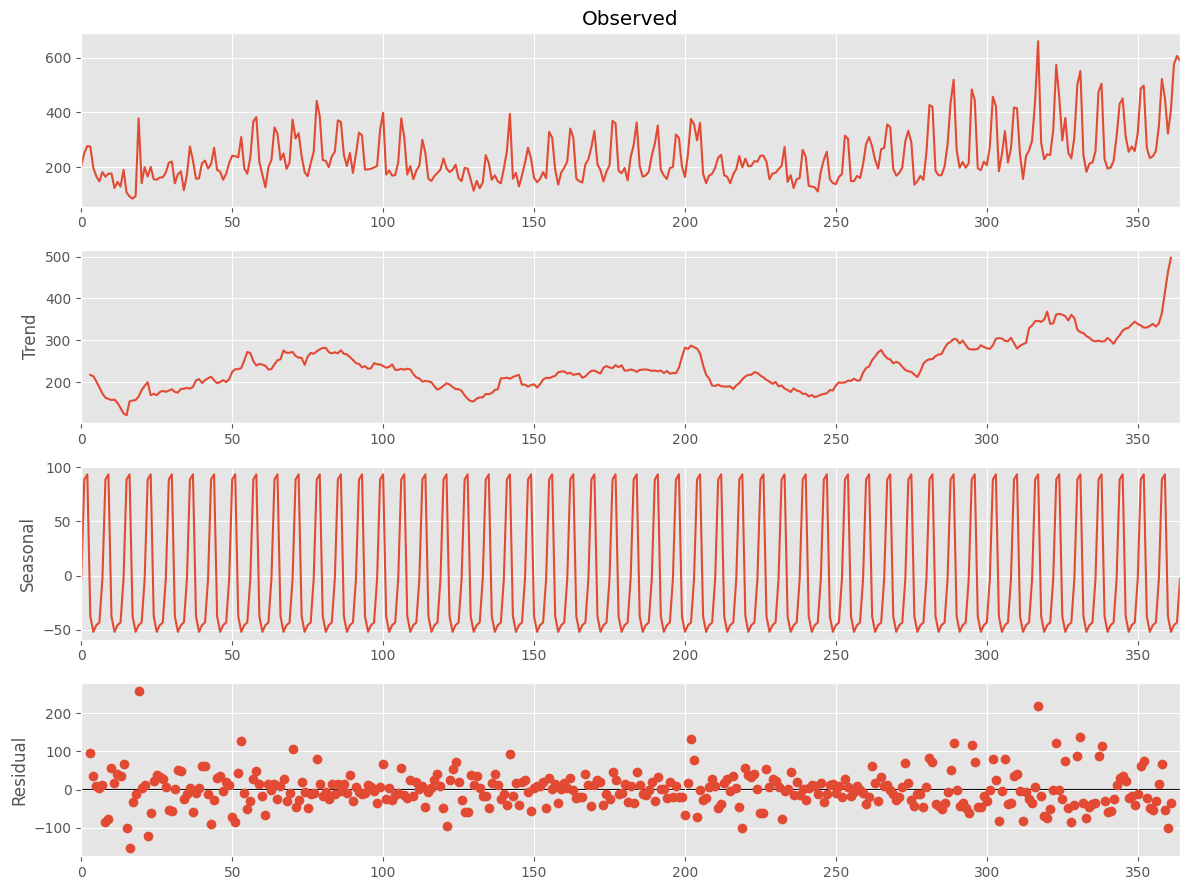

In [80]:
# 成分分解
result=seasonal_decompose(twitter_perday, model='additive', period=7)
# グラフ化
result.plot()
plt.show()

## 乗算モデル

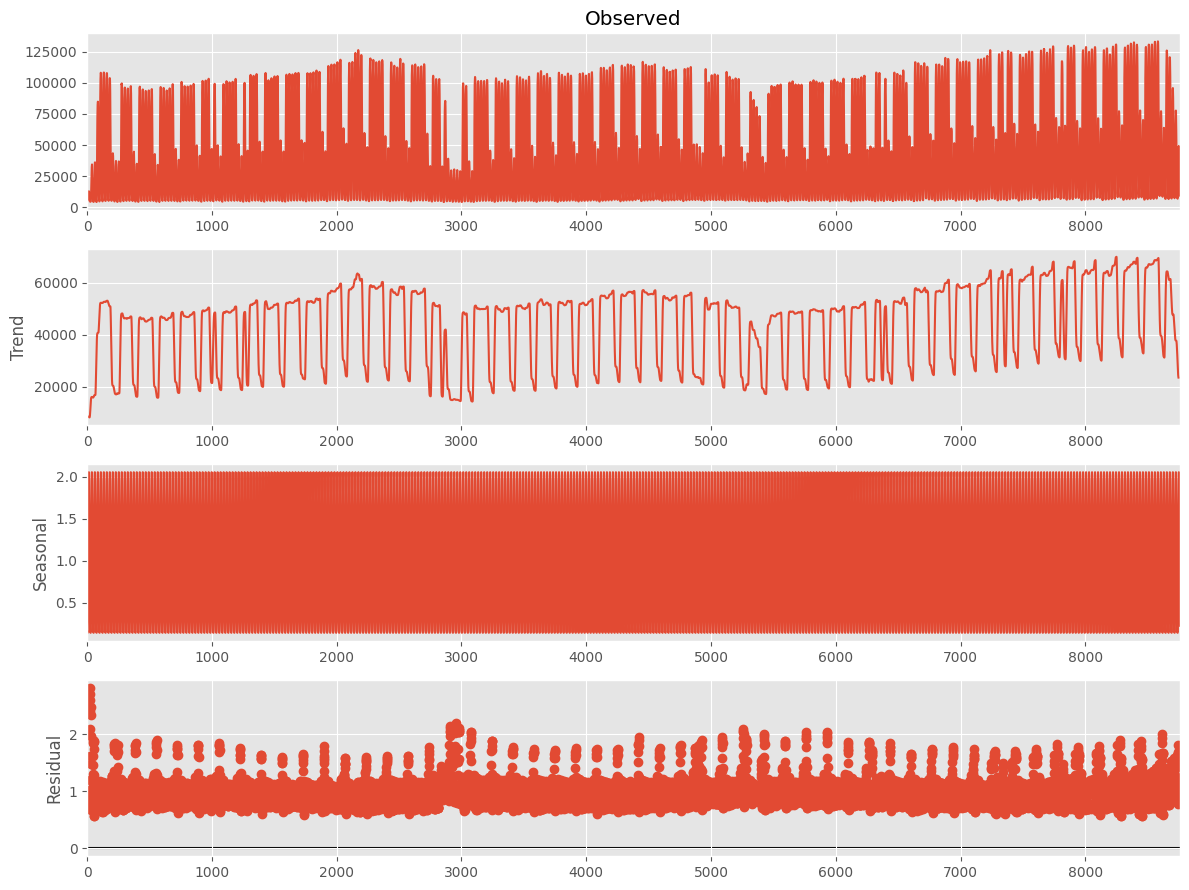

In [81]:
# 成分分解
result=seasonal_decompose(mobile_flatten, model='multiplicative', period=24)
# グラフ化
result.plot()
plt.show()

## STL分解

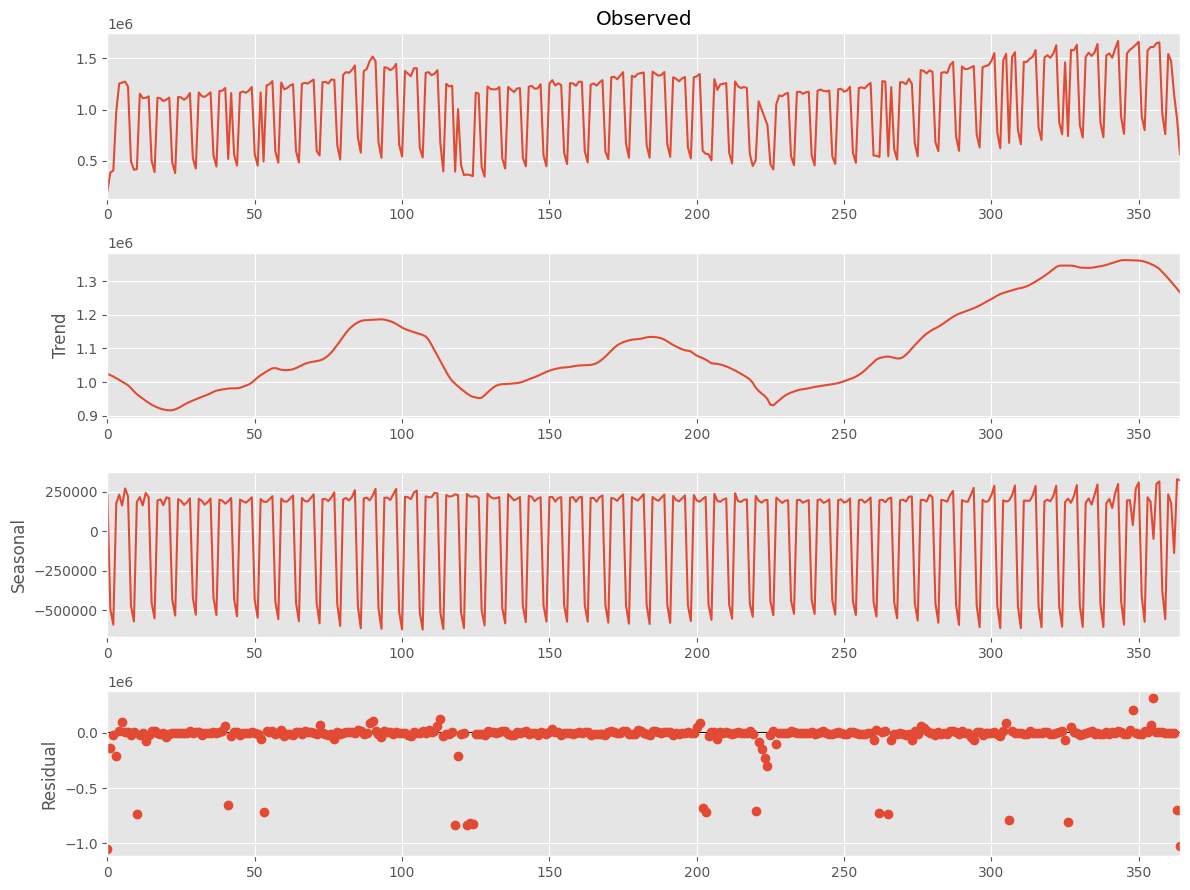

In [82]:
# 成分分解
stl=STL(mobile_perday, period=7, robust=True).fit()
# STL分解結果のグラフ化
stl.plot()
plt.show()

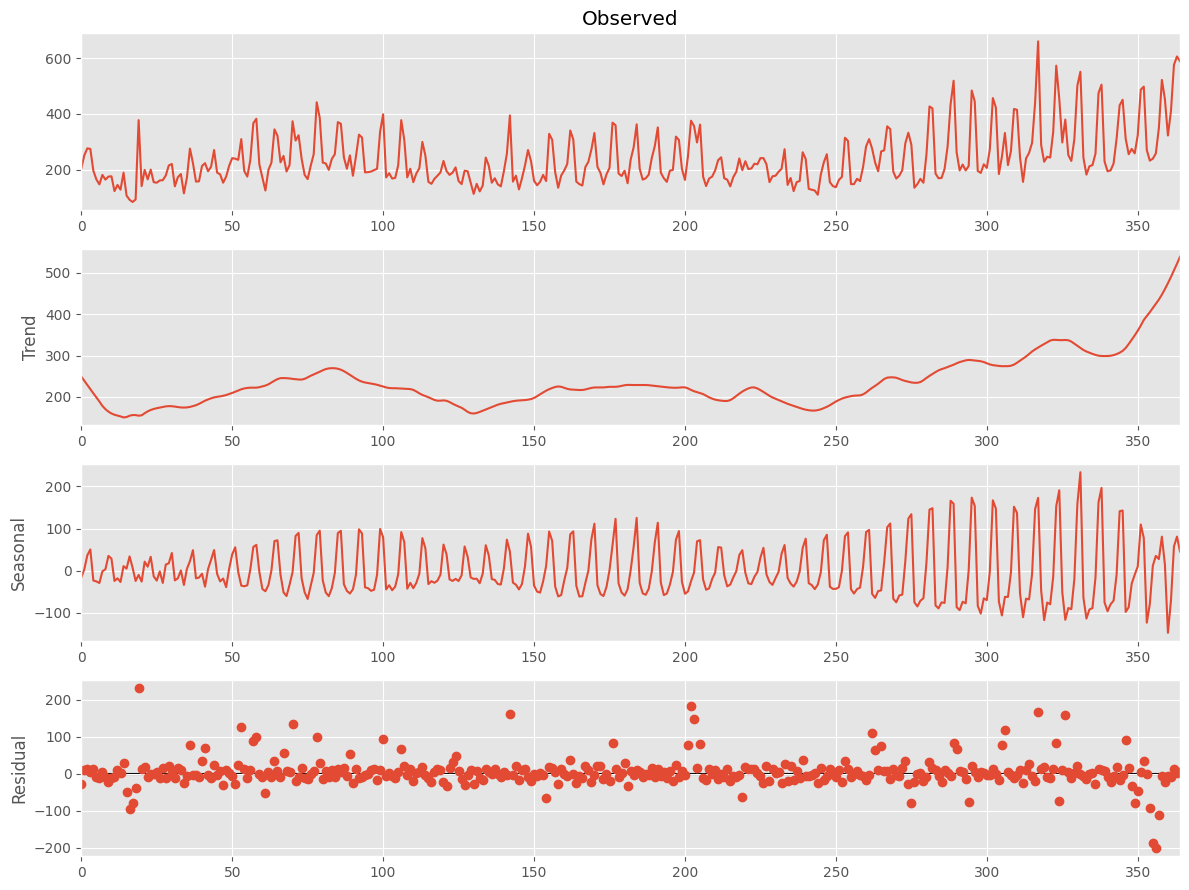

In [83]:
# 成分分解
stl=STL(twitter_perday, period=7, robust=True).fit()
# STL分解結果のグラフ化
stl.plot()
plt.show()

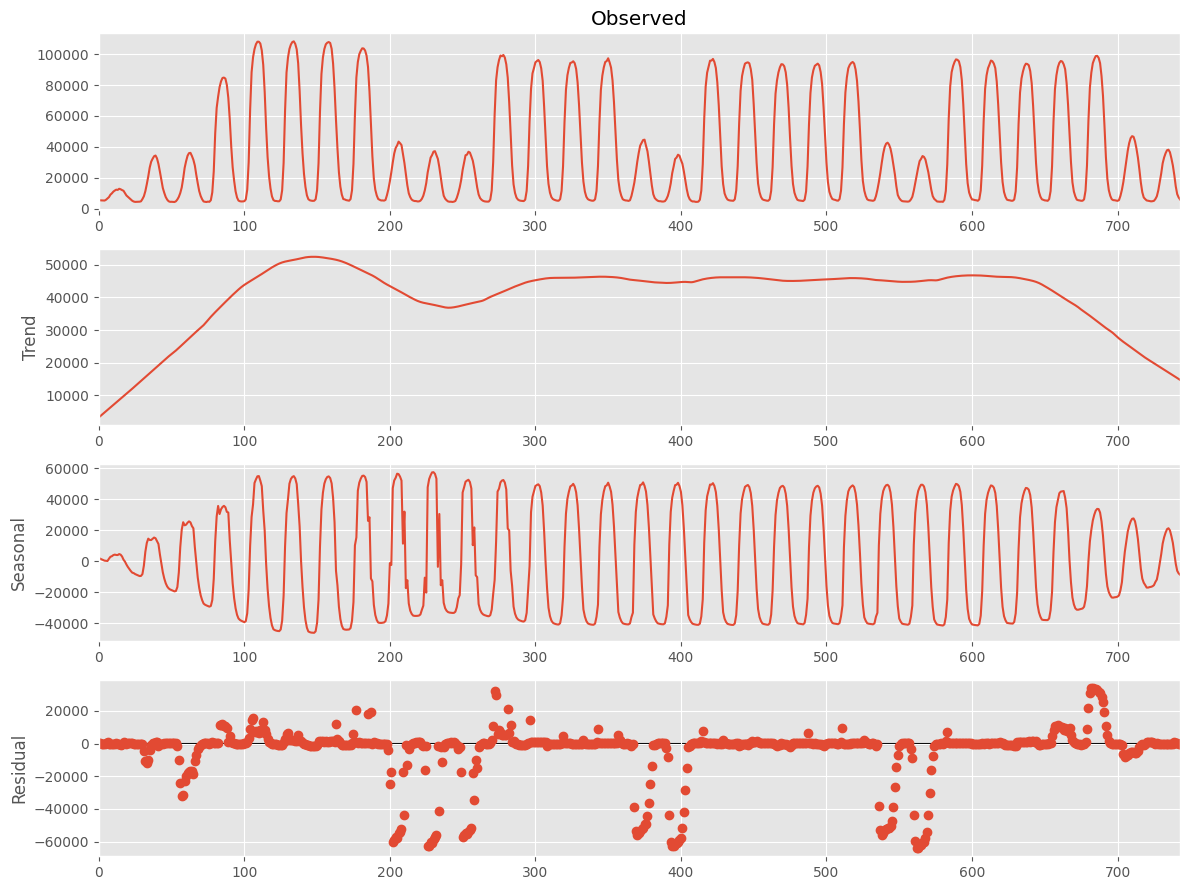

In [84]:
# 成分分解
stl=STL(mobile_flatten[0:744], period=24, robust=True).fit()
# STL分解結果のグラフ化
stl.plot()
plt.show()

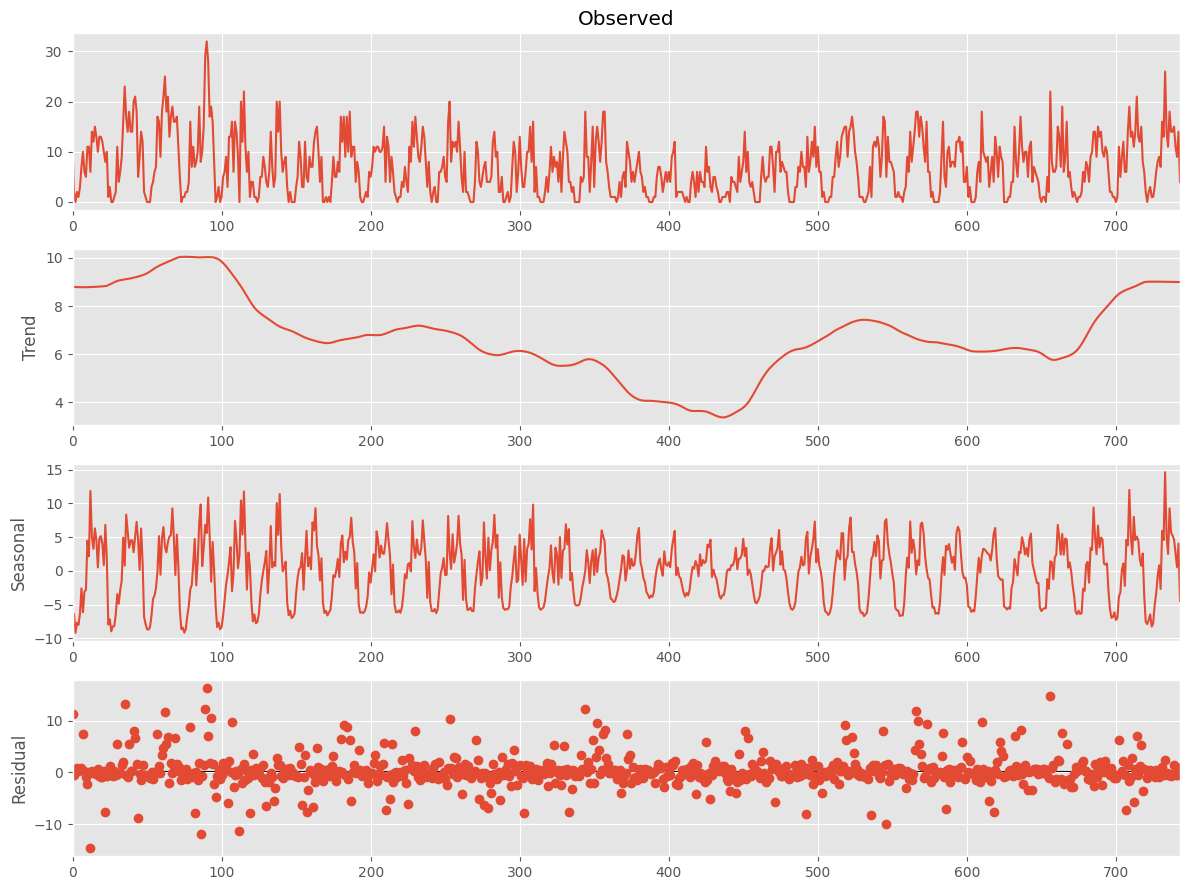

In [85]:
# 成分分解
stl=STL(twitter_flatten[0:744], period=24, robust=True).fit()
# STL分解結果のグラフ化
stl.plot()
plt.show()